<a href="https://colab.research.google.com/github/VDidyk/AI/blob/master/module2/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv")

In [ ]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Завдання 1
Вмведіть основні числові характеристики для числових ознак

In [ ]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


# Завдання 2
Проаналізуйте стовпчик `case`, чи є він інформативним?

In [ ]:
print(df["case"].info())
print(df["case"].describe())
print(df["case"].nunique())

#Судячи з даних, ця колонка це альтернатива ІДшки. Кожен рядок має унікальне значення. Тож корисної інформації вона не містить.

<class 'pandas.core.series.Series'>
RangeIndex: 104 entries, 0 to 103
Series name: case
Non-Null Count  Dtype
--------------  -----
104 non-null    int64
dtypes: int64(1)
memory usage: 960.0 bytes
None
count    104.000000
mean      52.500000
std       30.166206
min        1.000000
25%       26.750000
50%       52.500000
75%       78.250000
max      104.000000
Name: case, dtype: float64
104


# Завдання 3
Очистіть дані від викидів. Виведіть очищений датафрейм

In [8]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

for column_name in df.columns:
  if df.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  sales = remove_outliers(df, column_name)

# Завдання 4
Намалюйте матрицб кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму.

<ipython-input-10-7ec1b3b9c864>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr(method='pearson')


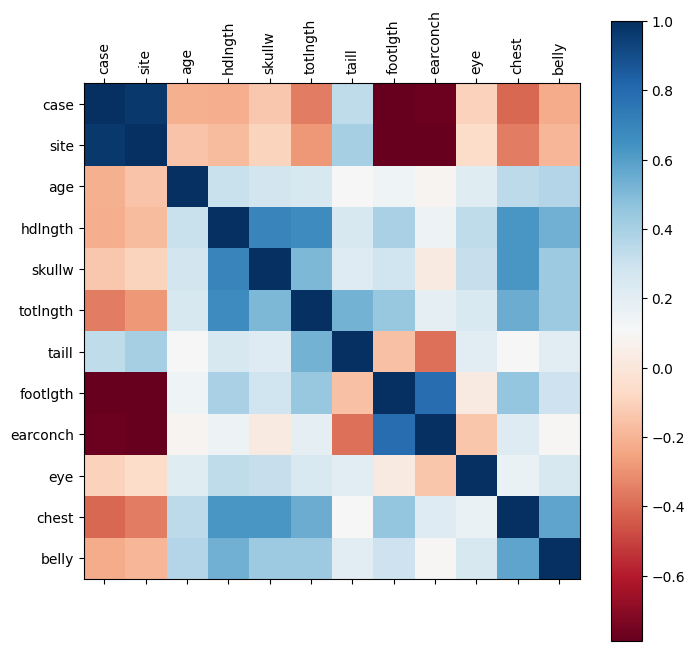

In [10]:
corr = sales.corr(method='pearson')

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

<Axes: xlabel='chest', ylabel='belly'>

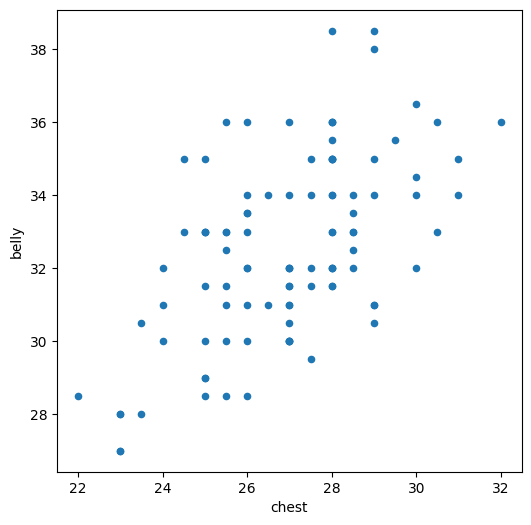

In [22]:
sales.plot(kind='scatter', x='chest', y='belly', figsize=(6,6))

<Axes: xlabel='earconch', ylabel='footlgth'>

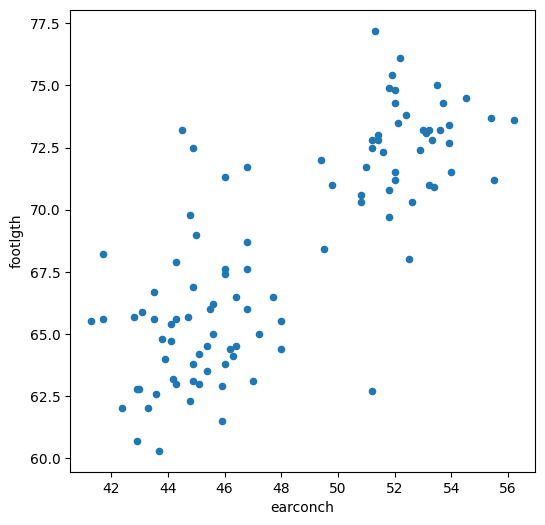

In [23]:
sales.plot(kind='scatter', x='earconch', y='footlgth', figsize=(6,6))

# Завдання 5
Для 4-ох числових ознак на вибір намалюйте ящики з вусами згрупованими по статі. Подумайте чи є вплив статі на розміри опосума

array([[<Axes: title={'center': 'hdlngth'}, xlabel='[sex]'>,
        <Axes: title={'center': 'skullw'}, xlabel='[sex]'>],
       [<Axes: title={'center': 'taill'}, xlabel='[sex]'>,
        <Axes: title={'center': 'totlngth'}, xlabel='[sex]'>]],
      dtype=object)

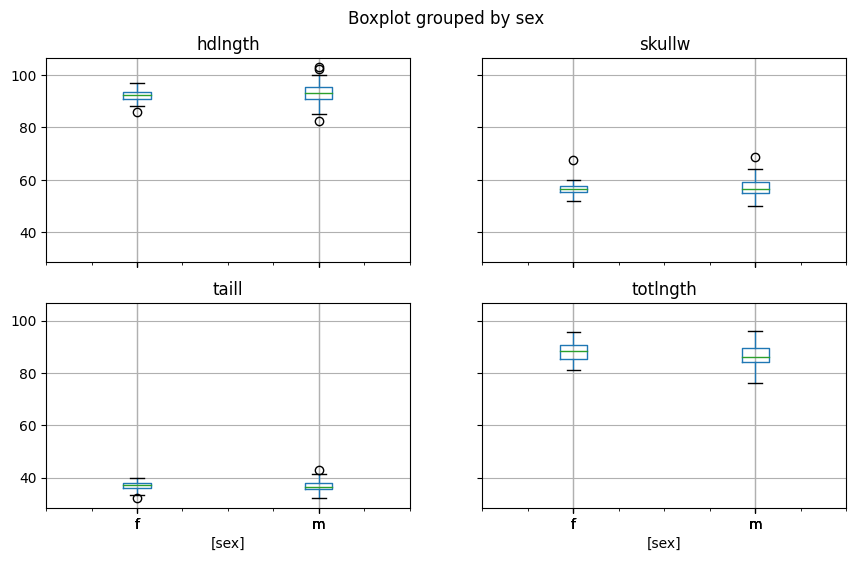

In [25]:
sales[["sex","hdlngth","skullw","totlngth","taill"]].boxplot(by='sex', figsize=(10,6))

#По малюнкам видно що у всіх опосумів чоловічої статі розмах більший. Також більший максимум. Хоча є один максимальний параметр у skullw, але він позначається як викид, відповідно не зважається. Але що цікаво, що також у самців є розміри і меньші від самок.
#Тобто самці можуть бути як меньшими так і більшими, коли самки приблизно однакових розмірів
